Penguin Classification Analysis

Problem Statement:

The Penguin Classification Analysis problem involves predicting the species of a penguin
based on various physical characteristics. The dataset includes information about the body
mass, culmen length, culmen depth, flipper length, and sex of different penguin species.
The problem is typically approached as a classification problem, where the target variable is
the penguin species, and the features are the physical characteristics of the penguinsrate classification of penguin species can also help researchers understand the effects of
climate change and other environmental factors on penguin populations. The problem can
also be useful for conservation efforts, as it can help identify and protect endangered penguin
species.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-white')

In [ ]:
# loaading the dataset
df=pd.read_csv("penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Initial Check

In [ ]:
df.shape

(344, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Null Check

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Univariate Analysis

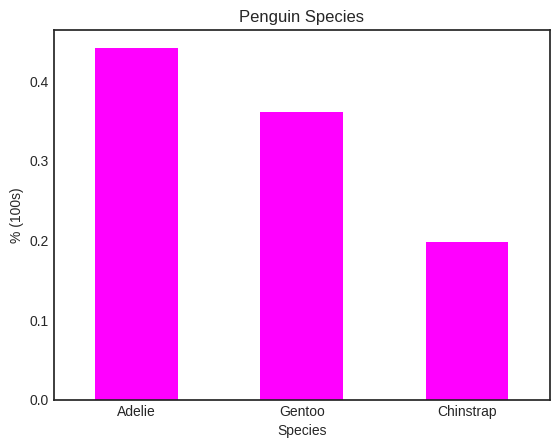

In [ ]:
df['species'].value_counts(normalize = True).plot(kind = 'bar',color= "magenta",linewidth = 1)
plt.title('Penguin Species')
plt.xlabel('Species')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

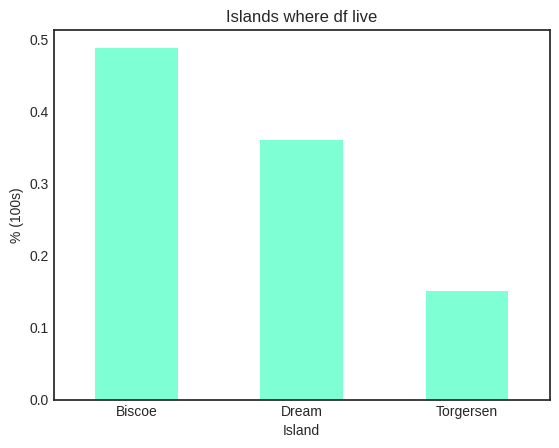

In [ ]:
df['island'].value_counts(normalize = True).plot(kind = 'bar', color = 'aquamarine', linewidth = 1)
plt.title('Islands where df live')
plt.xlabel('Island')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

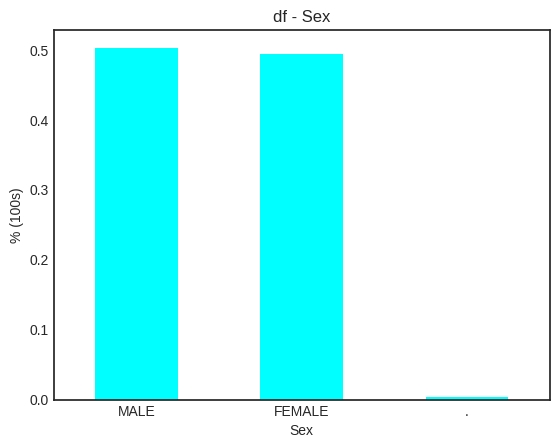

In [ ]:
df['sex'].value_counts(normalize = True).plot(kind = 'bar', color = 'cyan', linewidth = 1)
plt.title('df - Sex')
plt.xlabel('Sex')
plt.ylabel('% (100s)')
plt.xticks(rotation = 360)
plt.show()

This graph shows the inconsistency in this feature.

<Axes: xlabel='island', ylabel='culmen_length_mm'>

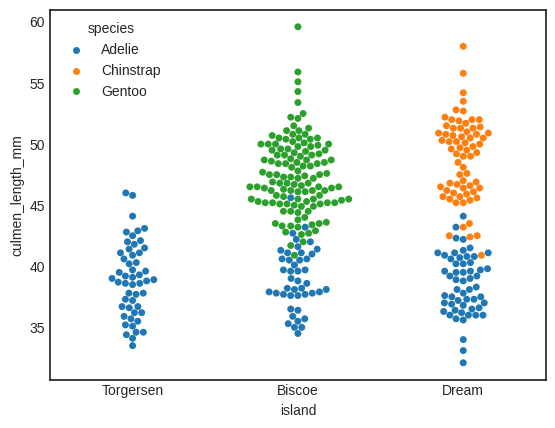

In [ ]:
sns.swarmplot(x=df.island,y=df.culmen_length_mm,hue=df.species)

Adelie lives in all the three islands.

Gentoo resides only in Biscoe.

Gentoo and Chinstrap have lengthier culmens compared to Adelie.

Bivariate Analysis

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

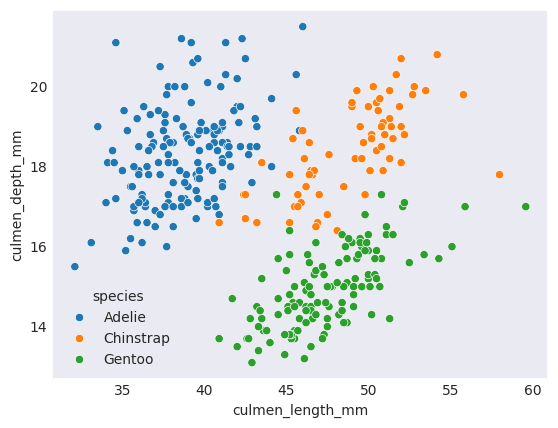

In [ ]:
sns.set_style('dark')
sns.scatterplot(x=df.culmen_length_mm,y=df.culmen_depth_mm,hue=df.species)

Clearly three groups of species can be identified.

Each of the species culmen_length and culmen_depth fall in a certain range

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

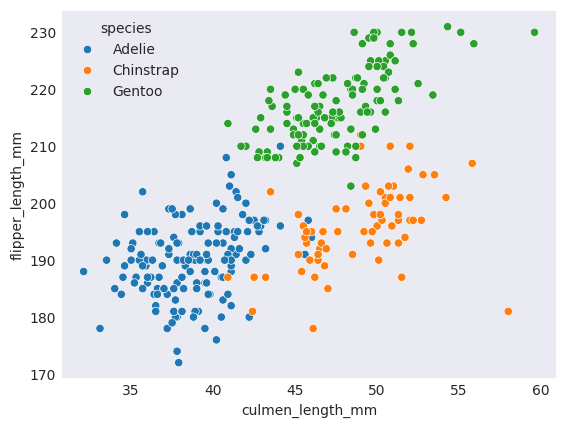

In [ ]:
sns.set_style('dark')
sns.scatterplot(x=df.culmen_length_mm,y=df.flipper_length_mm,hue=df.species)

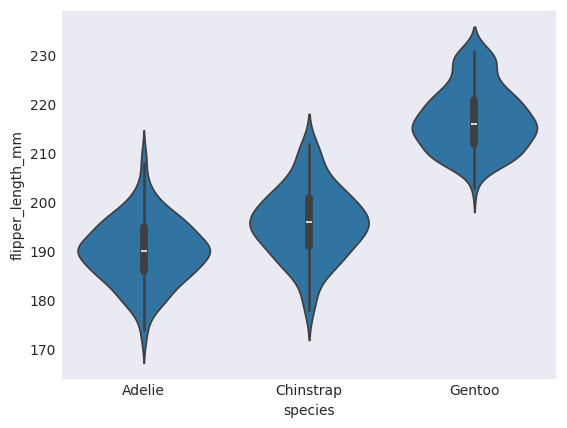

In [ ]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df)

Multivariate Analysis

In [ ]:
def box(f):
    sns.boxplot(y = f, x = 'species', hue = 'sex',data = df)
    plt.title(f)
    plt.show()

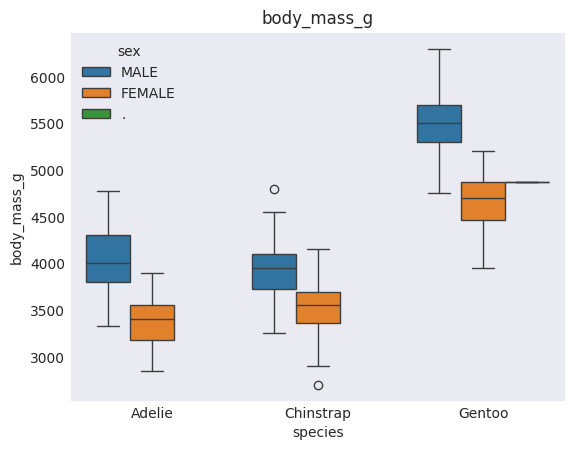

In [ ]:
box('body_mass_g')

From the box-plot it is pretty evident that male df are heavier than female df in all kinds of species.

Gentoo df weigh more than Adelie and Chinstrap

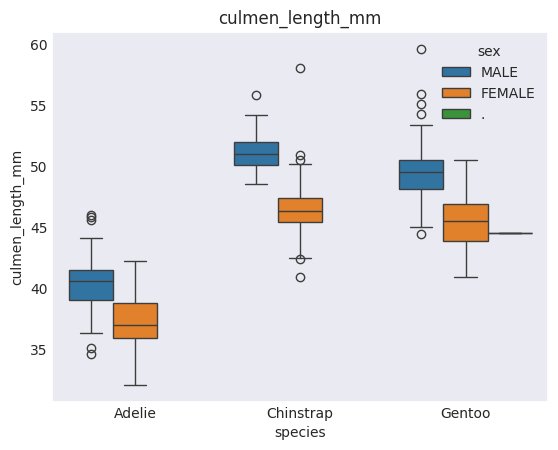

In [ ]:
box('culmen_length_mm')

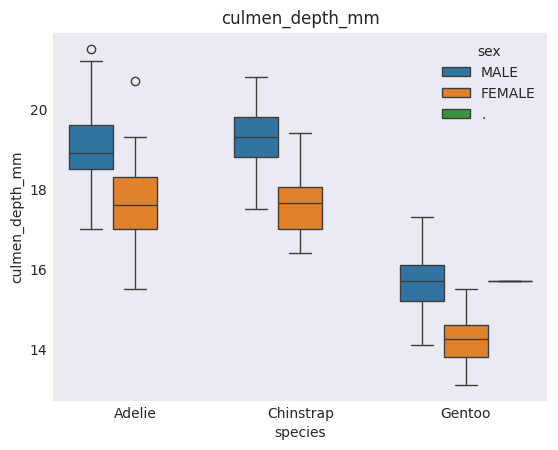

In [ ]:
box('culmen_depth_mm')

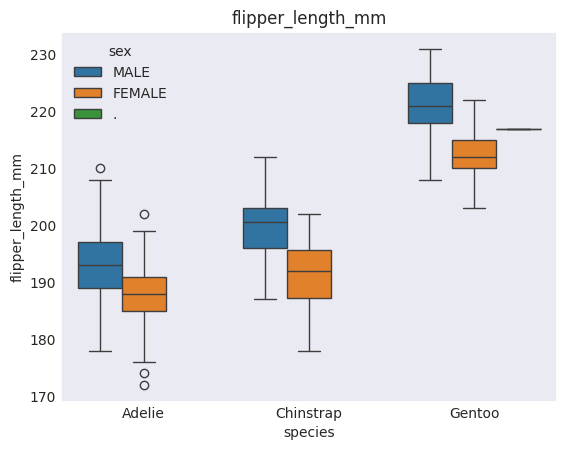

In [ ]:
box('flipper_length_mm')

A common thing which I noticed from all the above graphs is that the male df have more culmen length, depth, flipper length and body mass irrespective of their species. This would help us immensely during our modelling.

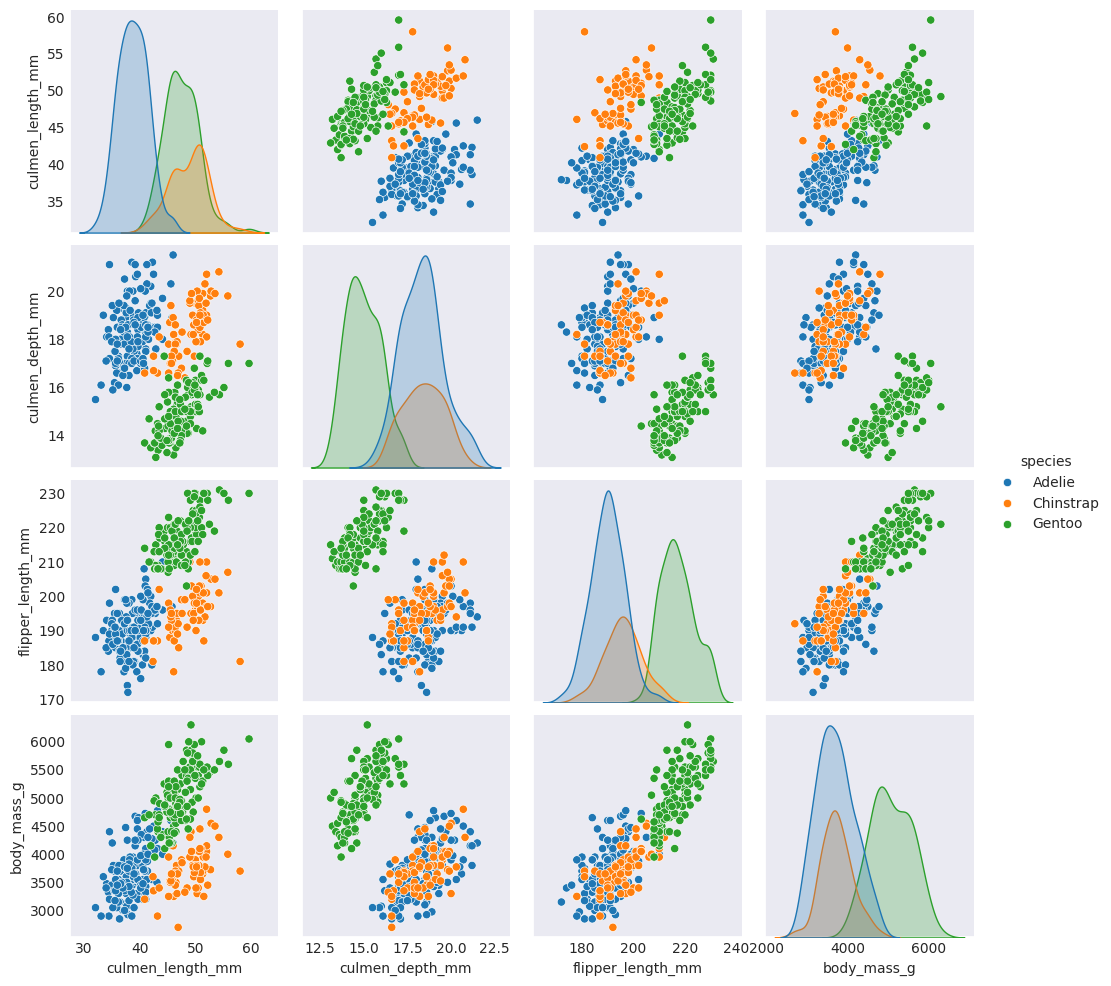

In [ ]:
sns.pairplot(df, hue = 'species')
plt.show()

Misisng Values

In [ ]:
new_df = df.copy()

new_df['culmen_length_mm'].fillna(np.mean(df['culmen_length_mm']), inplace = True)
new_df['culmen_depth_mm'].fillna(np.mean(df['culmen_depth_mm']), inplace = True)
new_df['flipper_length_mm'].fillna(np.mean(df['flipper_length_mm']), inplace = True)
new_df['body_mass_g'].fillna(np.mean(df['body_mass_g']), inplace = True)
new_df['sex'].fillna(df['sex'].mode()[0], inplace = True)

In [ ]:
new_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [ ]:
new_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

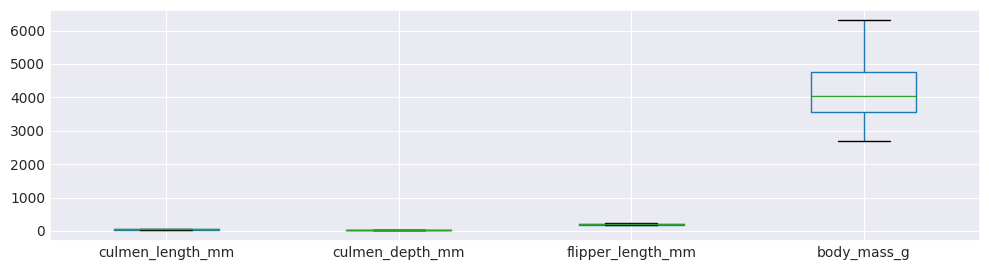

In [ ]:
#Finding Outliers
new_df.boxplot(figsize=(12, 3))
plt.show()

No as such outliers.

Descriptive Statistics

In [ ]:
new_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
pivot_table_result = pd.pivot_table(df,
                                    values=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                                    index=['species'],
                                    aggfunc='mean')

print(pivot_table_result.round(1))

           body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm
species                                                                     
Adelie          3700.7             18.3              38.8              190.0
Chinstrap       3733.1             18.4              48.8              195.8
Gentoo          5076.0             15.0              47.5              217.2


The pivot table shows distinct characteristics across the Adelie, Chinstrap, and Gentoo species in terms of culmen depth, culmen length, body mass, and flipper length.

Gentoo: Lead in all categories, having the deepest culmen, longest culmen, highest body mass, and longest flippers.

Chinstrap: Generally heavier than Adelie but similar in other aspects.

Adelie: Smallest in all metrics, very closely related to Chinstrap except for a slightly lower body mass.

In summary, Gentoo penguins are generally larger, while Adelie and Chinstrap are more similar to each other but differ slightly in body mass. These traits could serve as distinguishing features in ecological studies or machine learning models.

In [ ]:
pivot_table_result = pd.pivot_table(new_df,
                                    values=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                                    index=['sex'],
                                    aggfunc='mean')

pivot_table_result.round(1)

,body_mass_g,culmen_depth_mm,culmen_length_mm,flipper_length_mm
sex,,,,
.,4875.0,15.7,44.5,217.0
FEMALE,3862.3,16.4,42.1,197.4
MALE,4512.7,17.8,45.6,204.1


The table shows noticeable differences between female and male penguins in terms of culmen depth, culmen length, body mass, and flipper length:

Male Penguins: Generally larger in all metrics, including deeper and longer culmen, higher body mass, and longer flippers.

Female Penguins: Have smaller dimensions across the board, with shallower and shorter culmen, lower body mass, and shorter flippers.

These observations indicate sexual dimorphism in the penguin populations studied. The males are noticeably larger, suggesting that these metrics can be important features to distinguish between sexes in biological or machine learning studies.

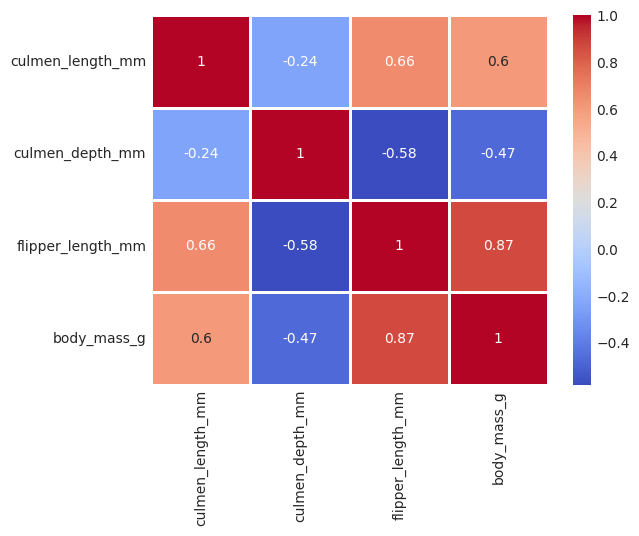

In [ ]:
selected_columns = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
correlation_matrix = selected_columns.corr().round(2)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=1)
plt.show()

The correlation matrix provides a quantified relationship between the continuous variables in the dataset, ranging from -1 to 1. Positive values indicate a positive correlation, whereas negative values suggest an inverse correlation. A value closer to 1 or -1 signifies a stronger correlation.

Culmen Length & Flipper Length (r=0.67): There is a moderately strong positive correlation between culmen length and flipper length, suggesting that penguins with longer culmen tend to have longer flippers.

Culmen Length & Body Mass (r=0.66): A similar moderately strong positive correlation is observed between culmen length and body mass, indicating that larger penguins generally have longer culmens.

Flipper Length & Body Mass (r=0.79): A strong positive correlation is present, indicating that flipper length is a good predictor of body mass or vice versa.

Culmen Depth & Body Mass (r=0.56): There's a moderate positive correlation between culmen depth and body mass, which suggests that penguins with deeper culmens are likely to have higher body mass, although not as strongly correlated as flipper length and body mass.

Culmen Length & culmen Depth (r=0.31): There is a weak positive correlation, which implies that they are somewhat related but not significantly.

Culmen Depth & Flipper Length (r=0.49): A moderate positive correlation exists, suggesting that deeper culmens are somewhat associated with longer flippers, but other factors could be at play.

In summary, flipper length shows the strongest correlations with other variables, particularly with body mass, making it a valuable metric for predicting a penguin's physical characteristics. On the other hand, culmen length and culmen depth show moderate to weak correlations with other features, suggesting that they capture different aspects of penguin morphology.

Check for Categorical columns and perform encoding.

In [ ]:
categorical_columns = new_df.dtypes[new_df.dtypes == 'object'].index.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['species', 'island', 'sex']


In [ ]:
new_df_dummy = pd.get_dummies(new_df, columns = ['sex', 'island'], drop_first = True)

In [ ]:
new_df_dummy['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
new_df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

Scaling the data

I've chosen MinMaxScaler for this exercise. This scales the values in the particular feature such that they lie within 0 and 1. This makes the dataset to have the same range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [ ]:
new_df['culmen_length_mm'] = mms.fit_transform(new_df['culmen_length_mm'].values.reshape(-1, 1))
new_df['culmen_depth_mm'] = mms.fit_transform(new_df['culmen_depth_mm'].values.reshape(-1, 1))
new_df['flipper_length_mm'] = mms.fit_transform(new_df['flipper_length_mm'].values.reshape(-1, 1))
new_df['body_mass_g'] = mms.fit_transform(new_df['body_mass_g'].values.reshape(-1, 1))

In [ ]:
new_df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.254545,0.666667,0.152542,0.291667,MALE
1,Adelie,Torgersen,0.269091,0.511905,0.237288,0.305556,FEMALE
2,Adelie,Torgersen,0.298182,0.583333,0.389831,0.152778,FEMALE


In [ ]:
new_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,0.429888,0.482282,0.490088,0.417154
std,0.197951,0.234408,0.237638,0.222115
min,0.000000,0.000000,0.000000,0.000000
25%,0.260909,0.297619,0.305085,0.236111
50%,0.441818,0.500000,0.423729,0.375000
75%,0.596364,0.666667,0.694915,0.569444
max,1.000000,1.000000,1.000000,1.000000


<Axes: >

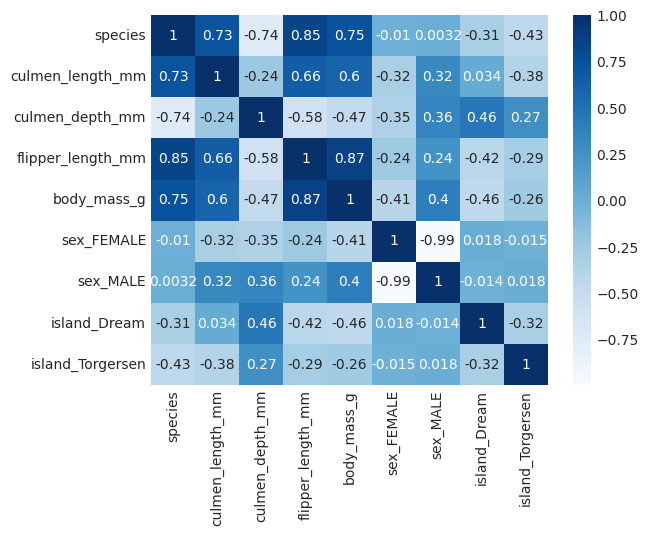

In [ ]:
sns.heatmap(new_df_dummy.corr(), annot = True, cmap = 'Blues')

As you see in the correlation map, there is a significant correlation seen between the predictors and the target. This would help us during the modelling stage.

Model Building

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix,classification_report, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Split the data into dependent and independent variables.

In [ ]:
X = new_df_dummy.drop(columns = ['species', 'sex_FEMALE', 'sex_MALE'])
Y = new_df_dummy['species']

Split the data into training and testing

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123)

Building the training models

In [49]:
LR = LogisticRegression(solver='liblinear', random_state=42)
LR.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [50]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [52]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

Testing the models

In [53]:
pred_LR = LR.predict(X_test)
pred_rf = rf.predict(X_test)
pred_svm =svm.predict(X_test)

Evaluation of Metrics

In [57]:
print("Logistic Regression Report:\n", classification_report(Y_test,pred_LR))
print("Random Forest Report:\n", classification_report(Y_test,pred_rf))
print("SVM Report:\n", classification_report(Y_test,pred_svm))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        28

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        28

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

SVM Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.94      0.84      0.89        19
          